In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotnine import *
from datetime import datetime

In [2]:
df = pd.read_csv('Credit_Card_uses.csv')
df
df.drop(columns='index',inplace=True) # Removing the irrelevent Column
print(df.shape)
print(df.info())
# df2 = pd.read_csv('Bangalore.csv')
# df2.info()


(26052, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       26052 non-null  object
 1   Date       26052 non-null  object
 2   Card Type  26052 non-null  object
 3   Exp Type   26052 non-null  object
 4   Gender     26052 non-null  object
 5   Amount     26052 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.2+ MB
None


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       26052 non-null  object
 1   Date       26052 non-null  object
 2   Card Type  26052 non-null  object
 3   Exp Type   26052 non-null  object
 4   Gender     26052 non-null  object
 5   Amount     26052 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [4]:
df.describe(include='O') # To describe stats for categorical colum

City       Date Card Type Exp Type Gender
count              26052      26052     26052    26052  26052
unique               986        600         4        6      2
top     Bengaluru, India  20-Sep-14    Silver     Food      F
freq                3552         65      6840     5463  13680

.Female Does more transactions than male
.Silver is the most used card.
.highest transactions are done in food Category.
.Bengaluru,India is the most frquent in transiction


In [5]:
#min, max and average amount spent
df["Amount"].agg(["sum","min","max","mean"]).reset_index()

index        Amount
0   sum  4.074833e+09
1   min  1.005000e+03
2   max  9.980770e+05
3  mean  1.564115e+05

we will first convert the date column to a datetime format

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

In [7]:
# average city spending in India 
# Grouping the data in the DataFrame df by the 'City' column and calculating the mean of the 'Amount' column for each city 
city_group = df.groupby('City')['Amount']
city_group
city_spending_mean=city_group.mean().reset_index()
city_spending_mean.head()
#Bar chart to show avg. city spending
top_cities = city_spending_mean.sort_values('Amount', ascending=False)
print(top_cities.head(10))

fig = px.bar(top_cities, y='City', x='Amount', color='Amount',
             title='Average Credit Card Spending by City',
             orientation='h')
fig.show()

                    City         Amount
862    Thodupuzha, India  296684.000000
422         Nahan, India  264597.600000
19          Alwar, India  263488.666667
348  Manendragarh, India  257140.500000
939       Vellore, India  256179.000000
248      Kashipur, India  254690.750000
655        Rewari, India  253201.800000
972        Yadgir, India  249814.333333
223        Kadapa, India  249608.428571
950      Viramgam, India  246201.000000


In [8]:
#Average Spending by Gender 
total_spent=df.groupby('Gender')['Amount'].mean().reset_index()
print(total_spent)

  Gender         Amount
0      F  161206.946637
1      M  151109.145086


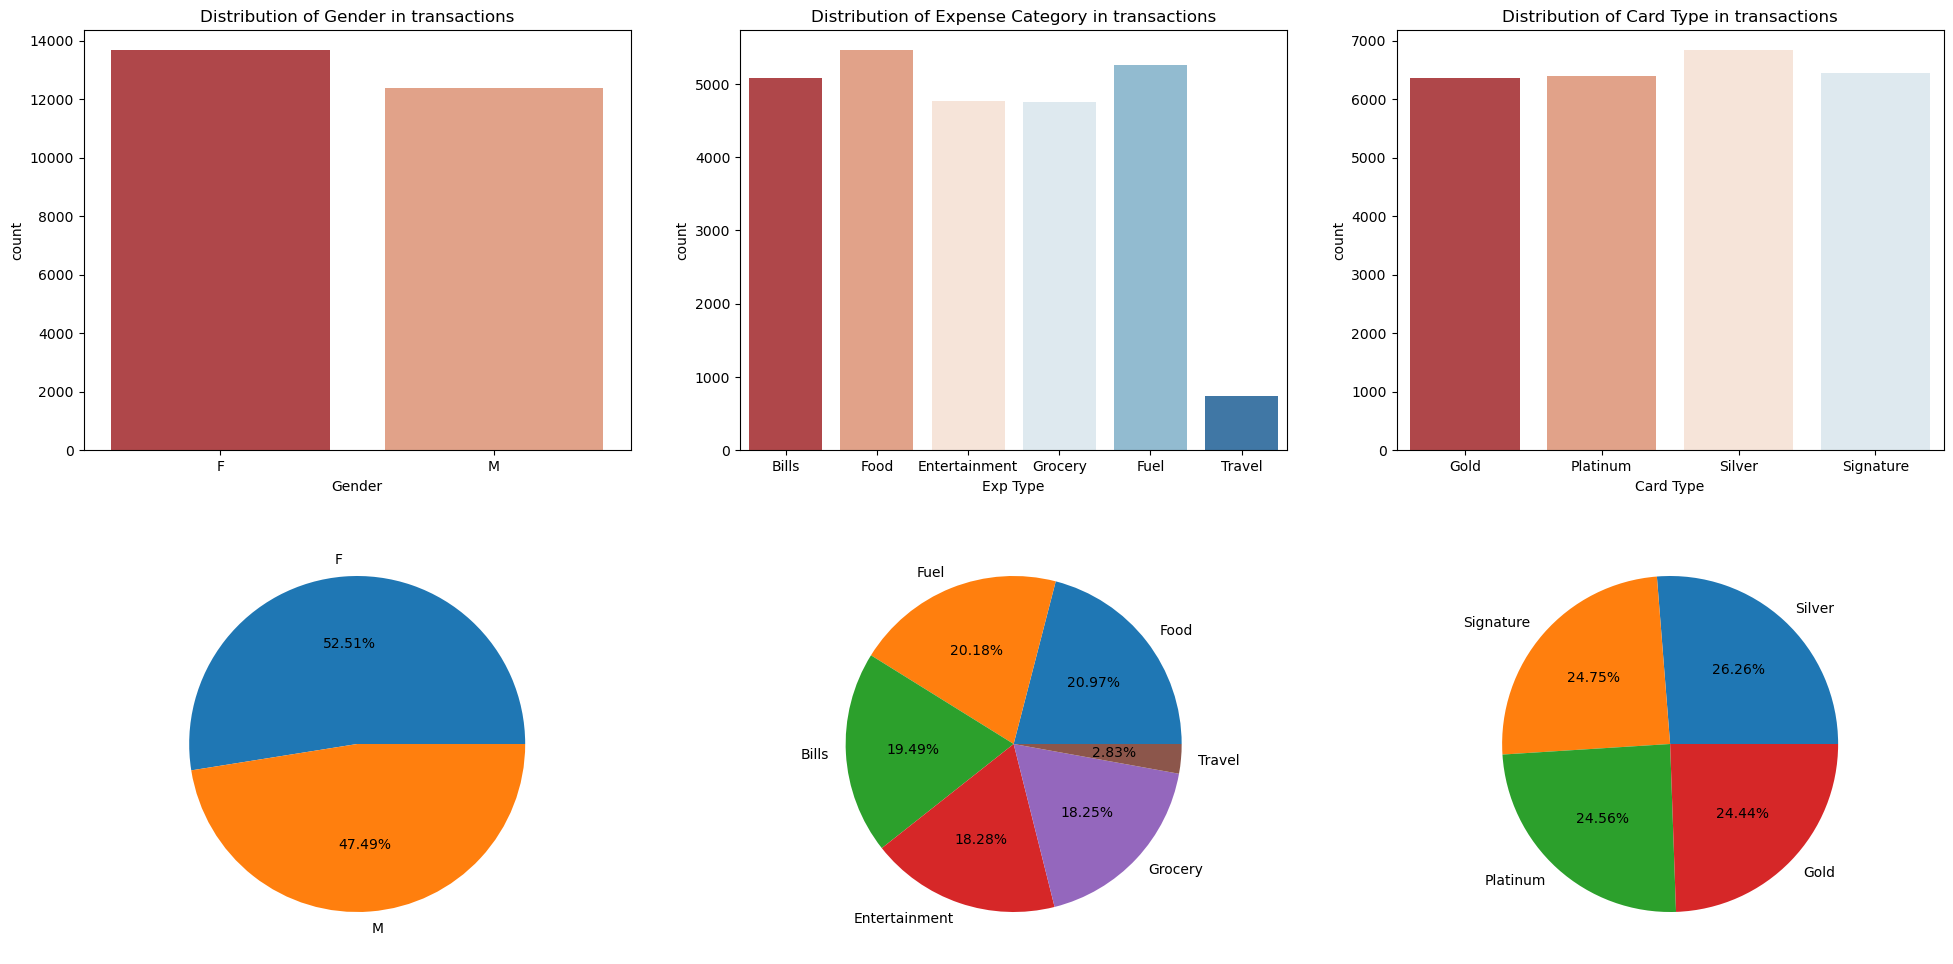

In [9]:
plt.subplots(2,3,figsize=(24,12))
plt.subplot(2,3,1)
sns.countplot(x=df["Gender"],palette=sns.color_palette("RdBu"))
plt.title("Distribution of Gender in transactions")

plt.subplot(2,3,2)
sns.countplot(x=df["Exp Type"],palette=sns.color_palette("RdBu"))
plt.title("Distribution of Expense Category in transactions")

plt.subplot(2,3,3)
sns.countplot(x=df["Card Type"],palette=sns.color_palette("RdBu"))
plt.title("Distribution of Card Type in transactions")

plt.subplot(2,3,4)
plt.pie(x=df["Gender"].value_counts(),labels=df["Gender"].value_counts().index,autopct="%0.2f%%")

plt.subplot(2,3,5)
plt.pie(x=df["Exp Type"].value_counts(),labels=df["Exp Type"].value_counts().index,autopct="%0.2f%%")

plt.subplot(2,3,6)
plt.pie(x=df["Card Type"].value_counts(),labels=df["Card Type"].value_counts().index,autopct="%0.2f%%")
plt.show()


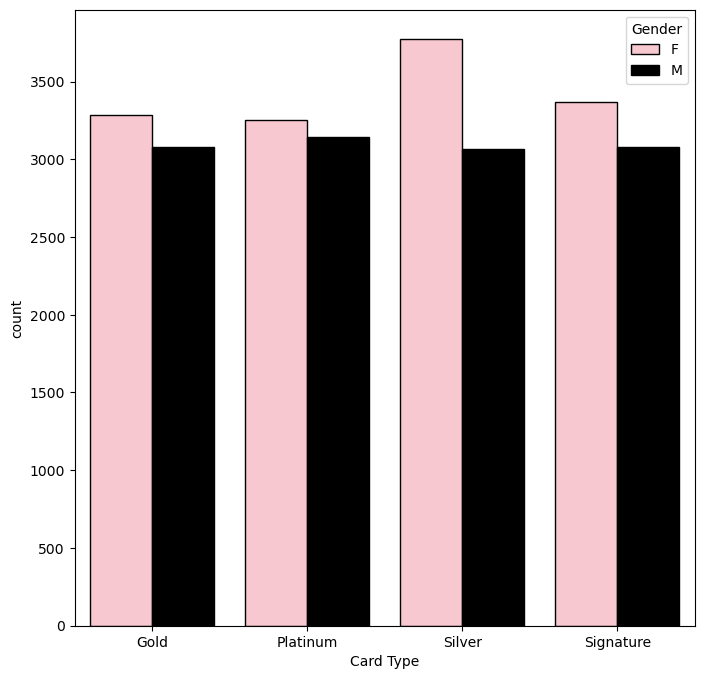

In [10]:
# card type were mostly used by the Males and Females
df.groupby("Gender")["Card Type"].value_counts().to_frame()
plt.figure(figsize=(8,8))
sns.countplot(x="Card Type",hue="Gender",data=df,palette=["pink","black"],edgecolor="black");

Gender  Exp Type     
F       Bills            580035469
        Entertainment    358663333
        Food             452817279
        Fuel             392282421
        Grocery          365646998
        Travel            55865530
M       Bills            327037004
        Entertainment    367774203
        Food             371906730
        Fuel             396853400
        Grocery          352560925
        Travel            53390081
Name: Amount, dtype: int64


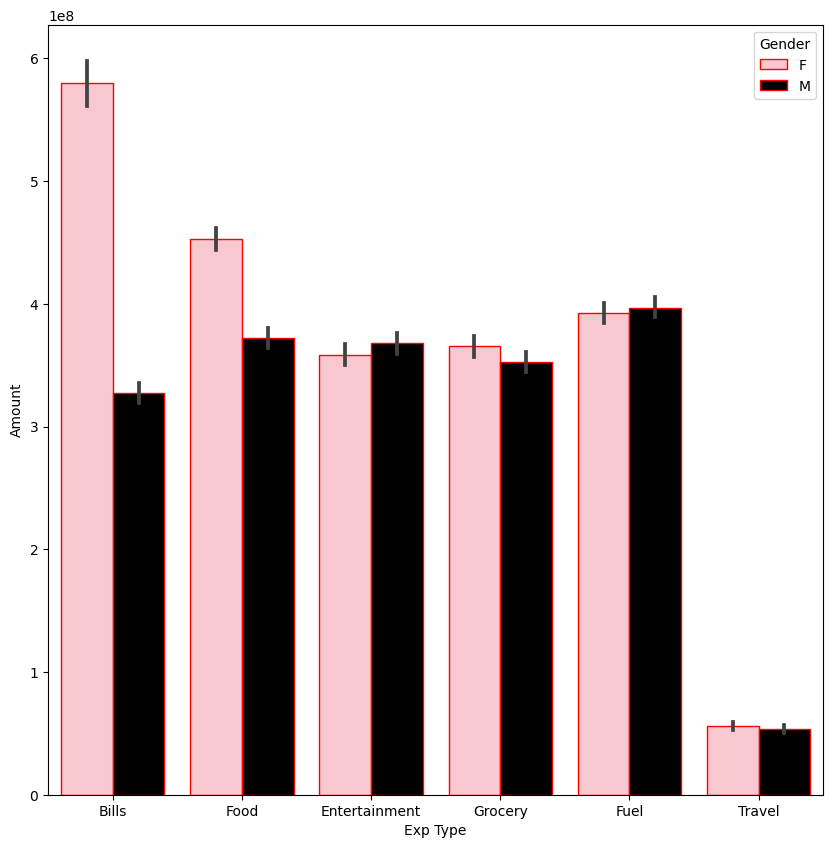

In [11]:
#Expenses type were mostly made by the genders
print(df.groupby(["Gender","Exp Type"])["Amount"].sum())
plt.figure(figsize=(10,10))
sns.barplot(x="Exp Type",y="Amount",hue="Gender",data=df,estimator=sum,edgecolor="red",palette=["pink","black"]);

Card Type
Gold         6367
Platinum     6398
Signature    6447
Silver       6840
Name: Card Type, dtype: int64
                  City  Card Type  Amount
0      Achalpur, India       Gold       4
1      Achalpur, India   Platinum       1
2      Achalpur, India  Signature       3
3      Achalpur, India     Silver       1
4      Adilabad, India       Gold       1
...                ...        ...     ...
3099       Zira, India  Signature       1
3100       Zira, India     Silver       1
3101   Zirakpur, India   Platinum       3
3102  Zunheboto, India  Signature       1
3103  Zunheboto, India     Silver       2

[3104 rows x 3 columns]
Index(['Bengaluru, India', 'Greater Mumbai, India', 'Ahmedabad, India',
       'Delhi, India', 'Hyderabad, India', 'Chennai, India', 'Kolkata, India',
       'Kanpur, India', 'Lucknow, India', 'Jaipur, India', 'Surat, India',
       'Pune, India', 'Kalyan-Dombivali, India', 'Ramnagar, India',
       'Udaipur, India'],
      dtype='object', name='City')


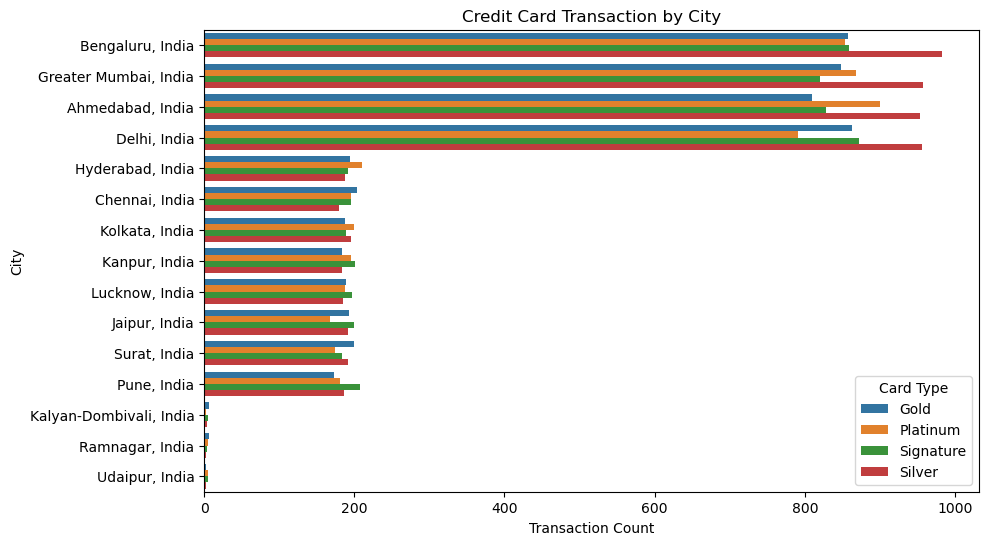

In [12]:
# Calculate the card count for each card type across all cities
card_count_all = df.groupby("Card Type")["Card Type"].count()
print(card_count_all)
# Calculate the card count for each city with each card type and create a new column for count amount
card_counts_c = df.groupby(['City', 'Card Type'])['Amount'].count().reset_index()
print(card_counts_c)
# # Filter only the top 15 cities by total transaction count
top_cities = card_counts_c.groupby('City')['Amount'].sum().sort_values(ascending=False).index[:15]
print(top_cities)
# Filter the card_counts_c DataFrame to only include the top 15 cities
card_counts_c = card_counts_c[card_counts_c['City'].isin(top_cities)]

# Sort the cities in descending order by transaction count
city_order = card_counts_c.groupby('City')['Amount'].sum().sort_values(ascending=False).index

# Plot the bar chart for top_cities
plt.figure(figsize=(10, 6))
sns.barplot(x='Amount', y='City', hue='Card Type', data=card_counts_c, orient='h', order=city_order)
plt.title('Credit Card Transaction by City')
plt.xlabel('Transaction Count')
plt.ylabel('City')
plt.show()


January      2722
December     2702
October      2665
March        2622
November     2622
April        2587
May          2436
February     2433
August       1393
September    1321
July         1310
June         1239
Name: Month, dtype: int64


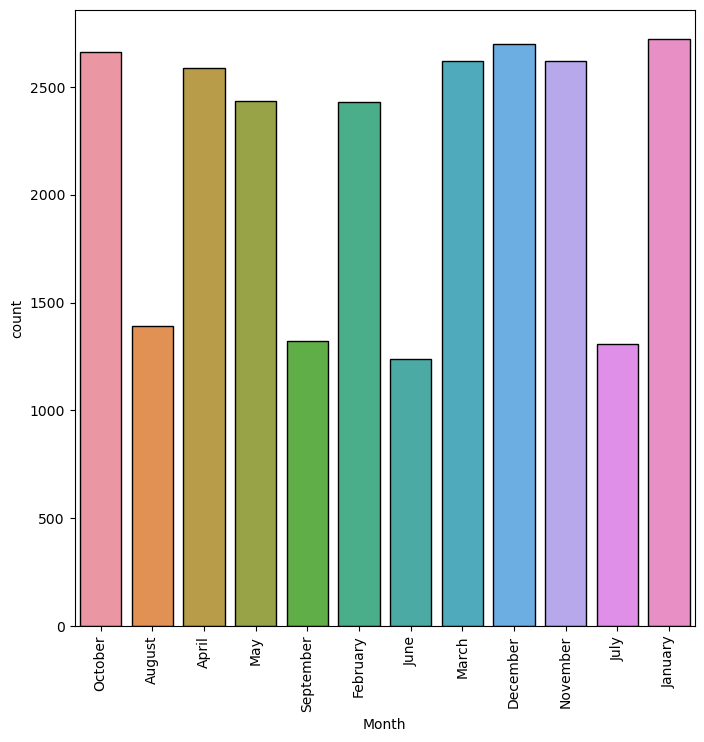

In [13]:
# monthly trend for card usage
df["Month"]=df["Date"].dt.month_name()
print(df["Month"].value_counts())
plt.figure(figsize=(8,8))
sns.countplot(x="Month",data=df,edgecolor="black")
plt.xticks(rotation=90);

 let's filter the data for the three cities that we are interested in - Delhi, Pune, and Bengaluru.

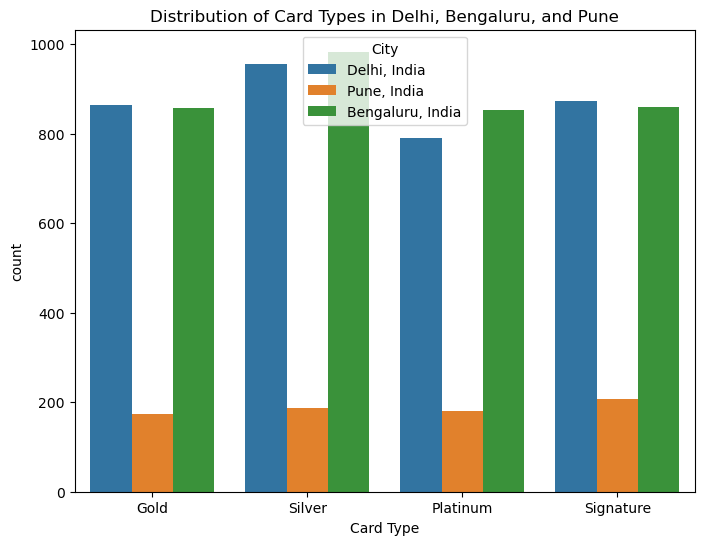

In [14]:
data=df
# Select data for the three cities
delhi_data = data[data["City"] == "Delhi, India"]
pune_data = data[data["City"] == "Pune, India"]
bengaluru_data = data[data["City"] == "Bengaluru, India"]

# Combine the data into a single DataFrame
city_data = pd.concat([delhi_data, pune_data, bengaluru_data])

# Plot the distribution of card types
plt.figure(figsize=(8,6))
sns.countplot(x="Card Type", hue="City", data=city_data)
plt.title("Distribution of Card Types in Delhi, Bengaluru, and Pune")
plt.show()


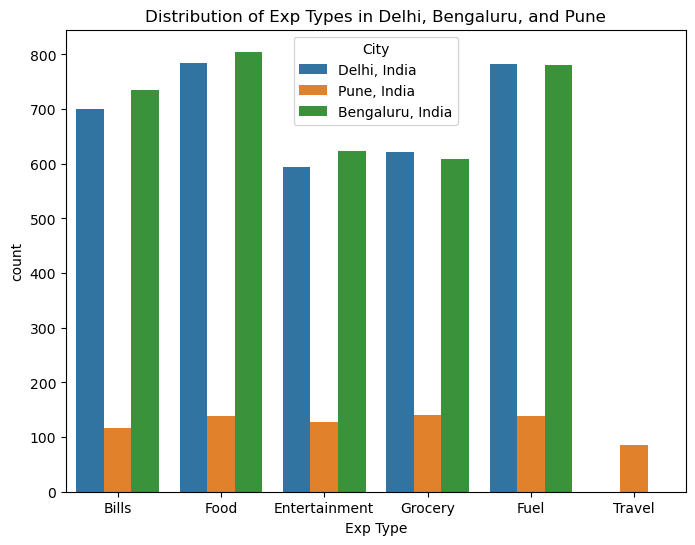

In [15]:
# Distribution of Exp Types in Pune
plt.figure(figsize=(8,6))
sns.countplot(x="Exp Type", hue="City", data=city_data)
plt.title("Distribution of Exp Types in Delhi, Bengaluru, and Pune")
plt.show()


2.START UP FUNDING DATA

In [16]:
import string
import datetime
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
# import seaborn as sns
# color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [17]:
df = pd.read_csv("startup_funding.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [18]:
df = pd.read_csv("startup_funding.csv")
df.columns = ["SNo", "Date", "StartupName", "IndustryVertical", "SubVertical", "City", "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]
#Replace the special characters "\xc2\xa0" and "\xc2\\xa0" in a string with an empty string. These characters are often used to represent non-breaking spaces or whitespace characters in web-based data,
#and can cause issues with data processing.
def clean_string(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0", "")

for col in ["StartupName", "IndustryVertical", "SubVertical", "City", "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]:
    df[col] = df[col].apply(lambda x: clean_string(x))
    
df.head()
df['StartupName'] = df['StartupName'].replace('flipkar.com', 'flipkart')
# df['StartupName'] = df['StartupName'].replace('Ola', 'Ola Cabs')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               3044 non-null   int64 
 1   Date              3044 non-null   object
 2   StartupName       3044 non-null   object
 3   IndustryVertical  3044 non-null   object
 4   SubVertical       3044 non-null   object
 5   City              3044 non-null   object
 6   InvestorsName     3044 non-null   object
 7   InvestmentType    3044 non-null   object
 8   AmountInUSD       3044 non-null   object
 9   Remarks           3044 non-null   object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [19]:

#Replacing some incorrect date formats with the correct ones. 
#It also creates two new columns in the DataFrame: "year" and "yearmonth", which extract the year and year-month from the "Date" 
#column using the pd.to_datetime() method.
df['Date'][df['Date']=='01/07/015'] = '01/07/2015'
df['Date'][df['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'
df['Date'][df['Date']=='12/05.2015'] = '12/05/2015'
df['Date'][df['Date']=='13/04.2015'] = '13/04/2015'
df['Date'][df['Date']=='15/01.2015'] = '15/01/2015'
df['Date'][df['Date']=='22/01//2015'] = '22/01/2015'
df['Date'][df['Date']=='05/072018'] = '05/07/2018'
df["year"] = pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.year
df["yearmonth"] = (pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.month)

In [20]:
#  Cleaning column 'CityLocation'
data=df
df.loc[df['City'].isin(['\\\\xc2\\\\xa0Noida', '\\xc2\\xa0Noida']), 'City'] = 'Noida'
df.loc[df['City'].isin(['\\\\xc2\\\\xa0Bangalore', '\\xc2\\xa0Bangalore', 'Bangalore']), 'City'] = 'Bengaluru'
df.loc[df['City'].isin(['\\\\xc2\\\\xa0New Delhi', '\\xc2\\xa0New Delhi']), 'City'] = 'New Delhi'
df.loc[df['City'].isin(['\\\\xc2\\\\xa0Gurgaon', 'Gurugram']), 'City'] = 'Gurgaon'
df.loc[df['City'].isin(['\\\\xc2\\\\xa0Mumbai', '\\xc2\\xa0Mumbai']), 'City'] = 'Mumbai'
df['City'] = df['City'].replace('nan', 'Bengaluru')

len(df['City'].unique())


105

In [21]:
df.describe(include='O') # To describe stats for categorical colum

Date StartupName   IndustryVertical SubVertical       City  \
count         3044        3044               3044        3044       3044   
unique        1030        2457                822        1943        105   
top     08/07/2015    Ola Cabs  Consumer Internet         nan  Bengaluru   
freq            11           8                941         936       1022   

                InvestorsName  InvestmentType AmountInUSD Remarks  
count                    3044            3044        3044    3044  
unique                   2409              56         472      70  
top     Undisclosed Investors  Private Equity         nan     nan  
freq                       39            1356         960    2625

How much funds does startups generally get in India?

In [22]:

totalFunding = df['StartupName'].value_counts().head(20)

fig = px.scatter(totalFunding,x=totalFunding.index,y=totalFunding[0:],title='Total Number of Funding to Each Company',
                labels={
                    'index':"Company's Name",
                    'y':'Total No. of Times Funding Received'
                })

fig.show()

Which industries are favored by investors for funding?

In [23]:

df['IndustryVertical'] = df['IndustryVertical'].replace('nan', 'Consumer Technology')
df['IndustryVertical'] = df['IndustryVertical'].replace('eCommerce', 'E-Commerce').replace('Ecommerce', 'E-Commerce').replace('ECommerce', 'E-Commerce').replace('E-commerce', 'E-Commerce')
fundings_count_industry = pd.DataFrame(df['IndustryVertical'].value_counts().sort_values(ascending=False))[:10]
fundings_count_industry.rename(columns={'IndustryVertical':'Number of Fundings by Industry'}, inplace=True)

fundings_count_industry



Number of Fundings by Industry
Consumer Internet                               941
Technology                                      478
E-Commerce                                      296
Consumer Technology                             172
Healthcare                                       70
Finance                                          62
Logistics                                        32
Education                                        24
Food & Beverage                                  23
Ed-Tech                                          14

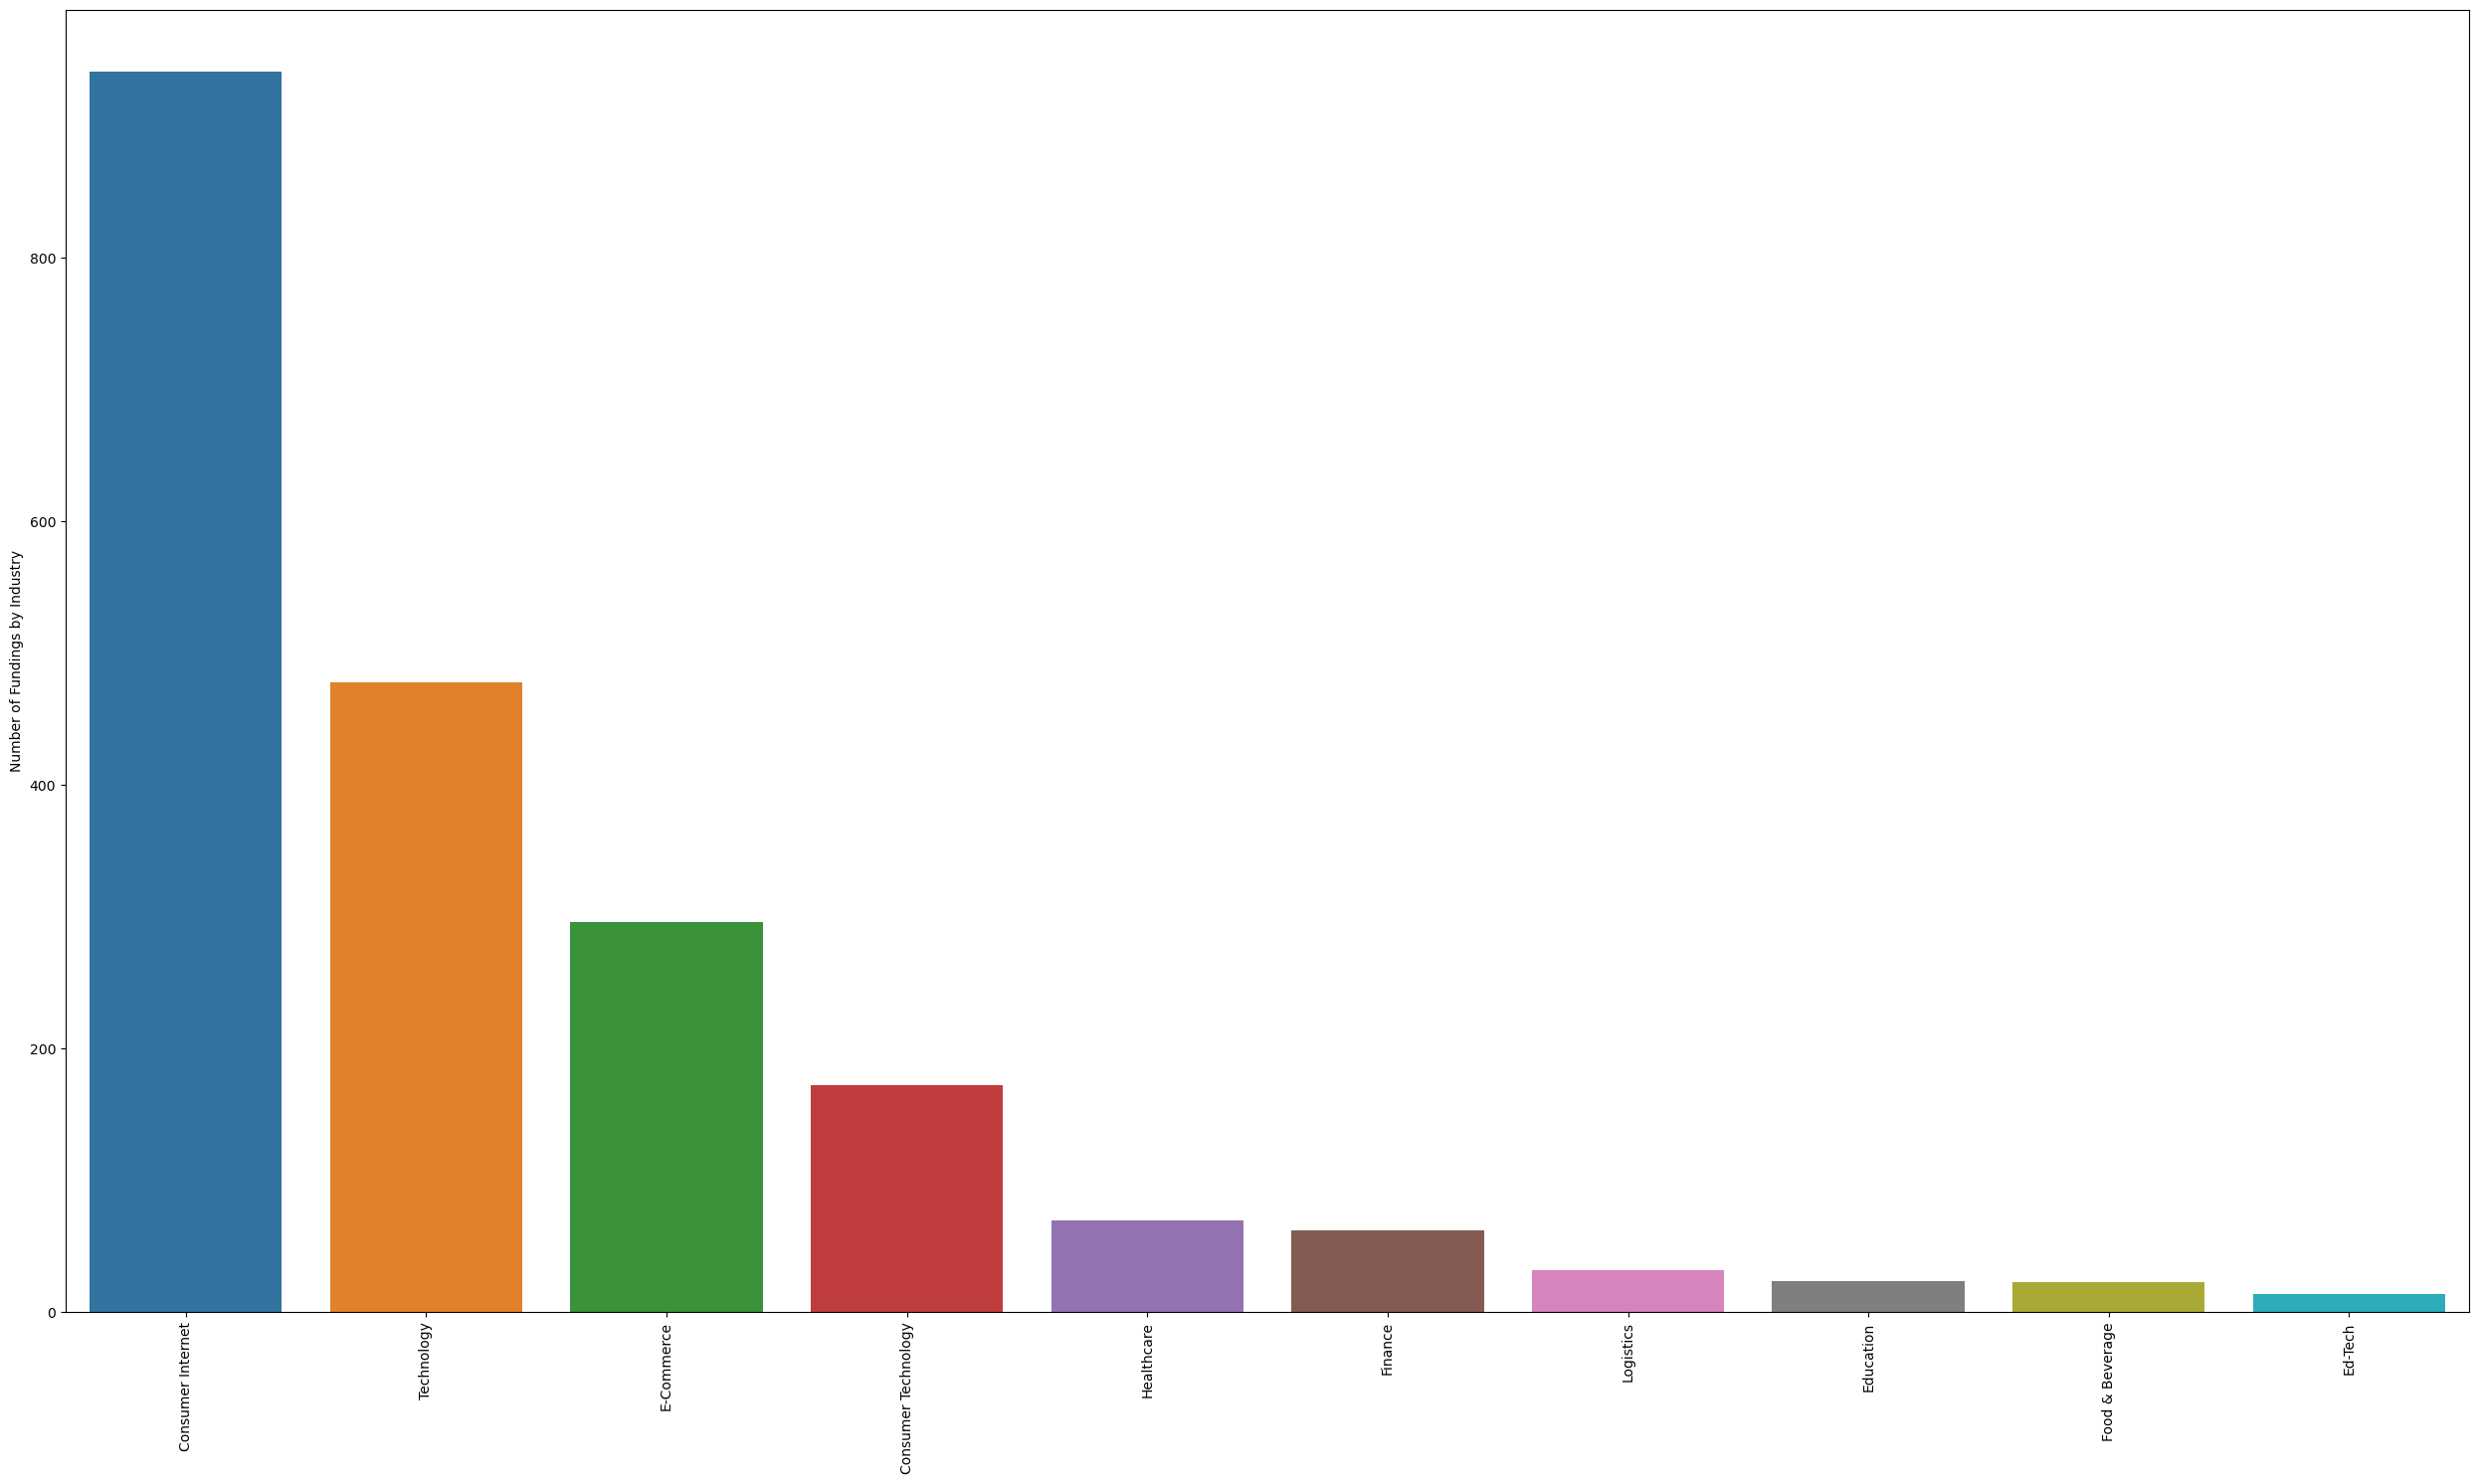

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25, 15))

sns.barplot(x=fundings_count_industry.index, y=fundings_count_industry['Number of Fundings by Industry'], data=fundings_count_industry, ax=axes).set_xticklabels(rotation=90, labels=fundings_count_industry.index)
fig.tight_layout(pad=1)
plt.xticks(rotation=90)
plt.show()

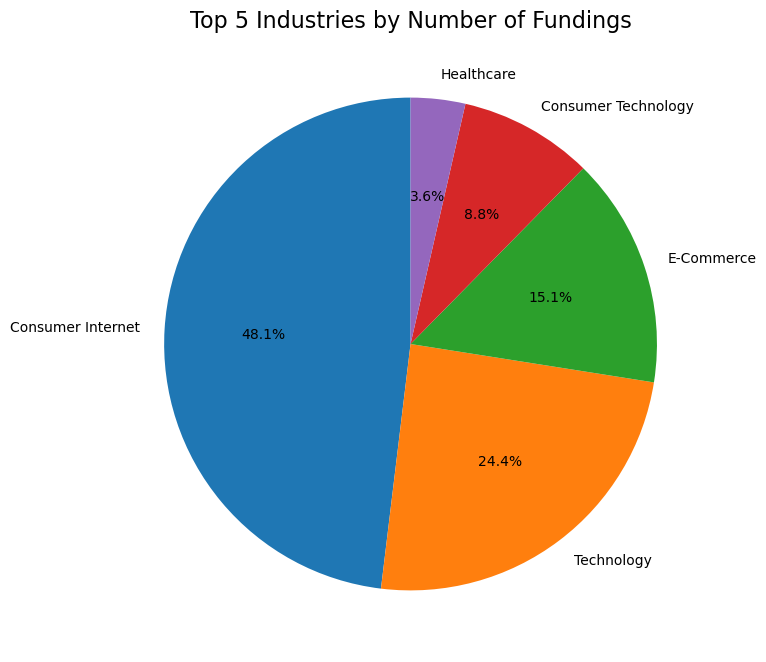

In [25]:
df['IndustryVertical'] = df['IndustryVertical'].replace('nan', 'Consumer Technology')
fundings_count_industry = pd.DataFrame(df['IndustryVertical'].value_counts().sort_values(ascending=False))[:5]
fundings_count_industry.rename(columns={'IndustryVertical':'Number of Fundings by Industry'}, inplace=True)

plt.figure(figsize=(8,8))
plt.pie(fundings_count_industry['Number of Fundings by Industry'], labels=fundings_count_industry.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Industries by Number of Fundings", fontsize=16)
plt.show()


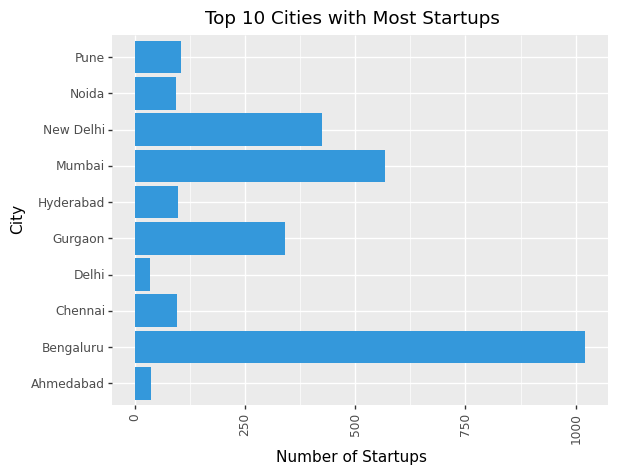

<ggplot: (143249319677)>

In [26]:
# cities play a major role in funding-
# Filter the top 10 cities based on the number of startups
top_cities = df['City'].value_counts().nlargest(10).sort_values(ascending=False)

# Create a new dataframe with the filtered cities
city_df = pd.DataFrame({'City': top_cities.index, 'Count': top_cities.values})

# Plot the data using ggplot
ggplot(city_df, aes(x='City', y='Count')) + \
    geom_bar(stat='identity', fill='#3498DB') + \
    ggtitle('Top 10 Cities with Most Startups') + \
    xlab('City') + \
    ylab('Number of Startups') + \
    theme(axis_text_x=element_text(angle=90)) + \
    coord_flip()




In [27]:
import plotly.express as px

# Create a dataframe with city counts
city_counts = df['City'].value_counts().nlargest(10).reset_index()
city_counts.columns = ['City', 'Count']

# Calculate percentage values
city_counts['Percentage'] = 100 * city_counts['Count'] / city_counts['Count'].sum()

# Create a pie chart
fig = px.pie(city_counts, values='Percentage', names='City', title='Top 10 Cities by Startup Count')
fig.show()


In [28]:
#The code  calculates the number of funding deals per year using the value_counts() method on the "year" column, 
#and creates a bar plot of the results using Plotly. The resulting plot is displayed using the py.iplot() function.
cnt_srs = df["year"].value_counts()
cnt_srs = cnt_srs.sort_index()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color="#1E90FF",
    ),
)

layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals over years",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")


In [29]:
import datetime
df["yearmonth"] = pd.to_datetime(df['Date'],format='%d/%m/%Y').apply(lambda x: datetime.date(x.year,x.month,1))



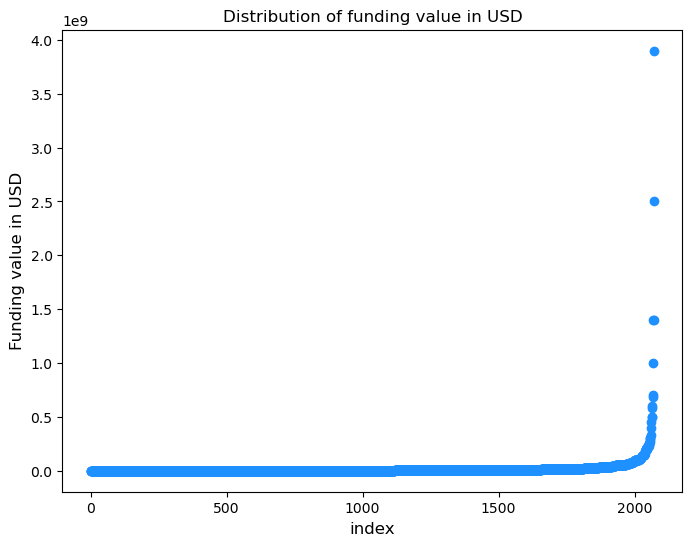

In [30]:
def clean_amount(x):
    if x.lower() == "unknown":
        x = "-999"
    else:
        x = str(x).replace(",","").replace("+","")
        x = str(x).lower().replace("undisclosed","")
        x = str(x).lower().replace("n/a","")
        if x == '':
            x = '-999'
    return x


df["CleanedAmount"] = df["AmountInUSD"].apply(lambda x: float(clean_amount(x)))

AmountInUSD = df["CleanedAmount"]
AmountInUSD = AmountInUSD[~np.isnan(AmountInUSD)]
AmountInUSD = AmountInUSD[AmountInUSD!=-999]
plt.figure(figsize=(8,6))
plt.scatter(range(len(AmountInUSD)), np.sort(AmountInUSD.values), color="#1E90FF")
plt.xlabel('index', fontsize=12)
plt.ylabel('Funding value in USD', fontsize=12)
plt.title("Distribution of funding value in USD")
plt.show()

In [31]:
df.iloc[df["CleanedAmount"].sort_values(ascending=False).index[:5]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SNo               3044 non-null   int64  
 1   Date              3044 non-null   object 
 2   StartupName       3044 non-null   object 
 3   IndustryVertical  3044 non-null   object 
 4   SubVertical       3044 non-null   object 
 5   City              3044 non-null   object 
 6   InvestorsName     3044 non-null   object 
 7   InvestmentType    3044 non-null   object 
 8   AmountInUSD       3044 non-null   object 
 9   Remarks           3044 non-null   object 
 10  year              3044 non-null   int64  
 11  yearmonth         3044 non-null   object 
 12  CleanedAmount     2084 non-null   float64
dtypes: float64(1), int64(2), object(10)
memory usage: 309.3+ KB


In [32]:
#This code calculates the mean funding amount for each industry vertical using the .groupby() method 
#and stores it in the industryType variable. Then, it selects only those industries that have a mean funding 
#amount greater than 100000000 (100 million) and stores them in the AboveM variable.
# it creates a scatter plot with bubbles
df.head()
# Filter for industries with funding over 100000000

industryType = df.groupby(['IndustryVertical'])['CleanedAmount'].mean()

AboveM = industryType[industryType>100000000]
fig = px.scatter(x = AboveM.index,y=AboveM,color=AboveM,size=AboveM,title='Funding (100M+) Vs Industry Type',
                labels={
                    'x':'Industry Type',
                    'y':'Average Funding'
                })
fig.show()


In [33]:
# df["CleanedAmount"][df["CleanedAmount"]==3900000000] = 50000000

cnt_df = df.groupby('year')['CleanedAmount'].agg(["sum", "mean"])
cnt_srs = cnt_df["sum"]
cnt_srs = cnt_srs.sort_index()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color="#1E90FF",
    ),
)

layout = go.Layout(
    title=go.layout.Title(
        text="Sum of funding value in each year",
        x=0.5
    ),
font=dict(size=14),
    width=800,
    height=500,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

In [34]:
cnt_srs = cnt_df["mean"]
cnt_srs = cnt_srs.sort_index()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color="#1E90FF",
    ),
)

layout = go.Layout(
    title=go.layout.Title(
        text="Mean of funding value in each year",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

In [35]:
import re
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
df['InvestmentType'] = df['InvestmentType'].apply(lambda x: remove_punctuation(str(x)))

funding_map = {
    "SeedAngel Funding": "Seed Angel Funding",
    "SeedFunding": "Seed Funding",
    "PrivateEquity": "Private Equity",
    "Crowd funding": "Crowd Funding",
    "Angel  Seed Funding": "Seed Angel Funding",
    "Seed  Angel Funding": "Seed Angel Funding",
    "Seed Angle Funding": "Seed Angel Funding",
    "Seed  Angle Funding": "Seed Angel Funding",
    "SeednFunding": "Seed Funding",
    "Seed funding": "Seed Funding",
"Seed Round": "Seed Funding",
    "preSeries A": "PreSeries A",
    "preseries A": "PreSeries A",
    "Pre Series A": "PreSeries A"
}

for i, v in funding_map.items():
    df['InvestmentType'][df['InvestmentType']==i] = v 

def horizontal_bar_chart(srs, color):
    trace = go.Bar(
        x=srs.values[::-1],
        y=srs.index[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

cnt_srs = df['InvestmentType'].value_counts()[:10]
layout = go.Layout(
    title=go.layout.Title(
        text="Count of Investment type",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

What are different types of funding for startups ?

In [36]:
investment = df['InvestmentType'].value_counts()
print(investment)

Seed Funding                   1393
Private Equity                 1357
Seed Angel Funding              141
Debt Funding                     25
Series A                         24
Series B                         20
Series C                         14
Series D                         12
PreSeries A                       8
Private Equity Round              4
Seed                              4
nan                               4
Corporate Round                   2
Equity                            2
Venture Round                     2
Crowd Funding                     2
Series F                          2
Series E                          2
Debt                              1
PrivatenEquity                    1
Angel Funding                     1
Term Loan                         1
Structured Debt                   1
Private                           1
Private Funding                   1
Equity Based Funding              1
Series B Extension                1
Mezzanine                   

Seed Funding          1393
Private Equity        1357
Seed Angel Funding     141
Debt Funding            25
Series A                24
Name: InvestmentType, dtype: int64


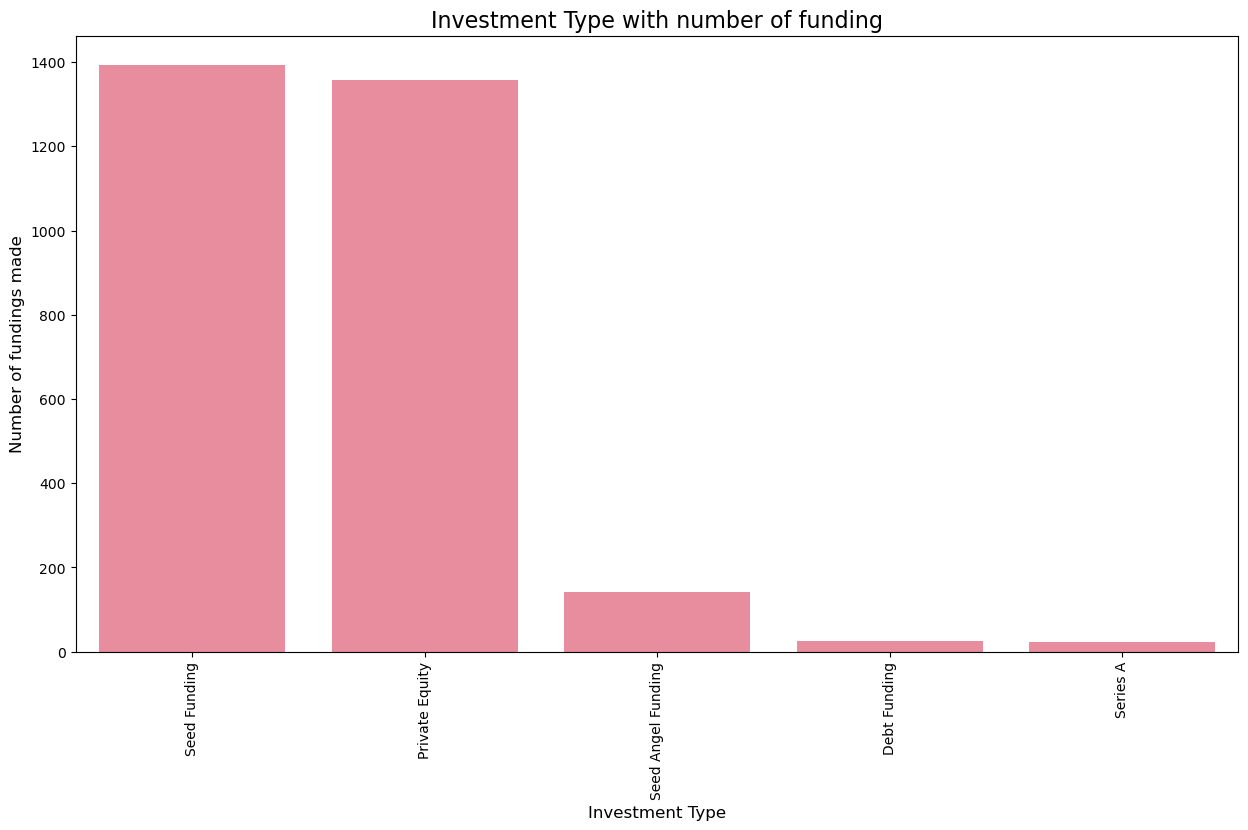

In [38]:
funding_data=df
investment = funding_data['InvestmentType'].value_counts().head(5)
print(investment)
color = sns.color_palette('husl', 8)
plt.figure(figsize=(15,8))
sns.barplot(x=investment.index, y=investment.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()


In [39]:
temp = investment
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Types of investment funding with %')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="BorrowerGender")

important investors in the Indian startups 

In [40]:
funding_data['InvestorsName'][funding_data['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
funding_data['InvestorsName'][funding_data['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
funding_data['InvestorsName'][funding_data['InvestorsName'] == 'undisclosed investors'] = 'Undisclosed Investors'
funding_data['InvestorsName'][funding_data['InvestorsName'] == 'Undisclosed investor'] = 'Undisclosed Investors'
funding_data['InvestorsName'][funding_data['InvestorsName'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
funding_data['InvestorsName'][funding_data['InvestorsName'] == 'Undisclosed'] = 'Undisclosed Investors'

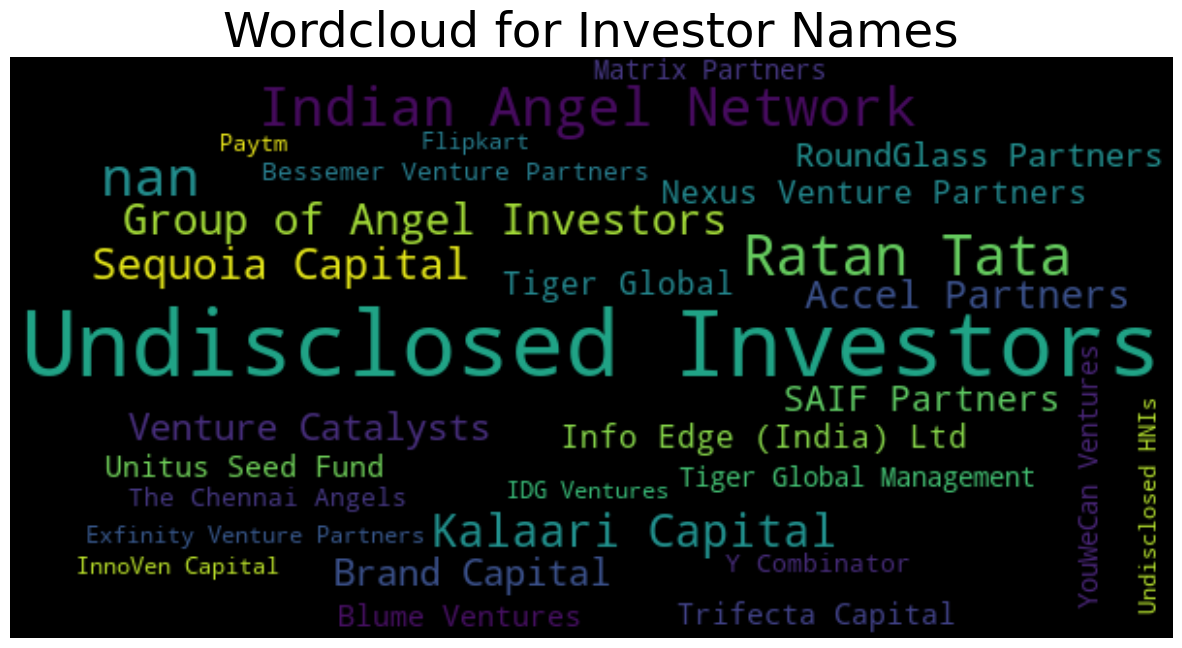

In [41]:
from wordcloud import WordCloud

investors = funding_data["InvestorsName"][~pd.isnull(funding_data["InvestorsName"])].value_counts().head(30)

wordcloud = WordCloud(max_font_size=50, width=600, height=300, max_words=len(investors)).generate_from_frequencies(investors)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()


In [42]:
df.head()

SNo        Date                   StartupName     IndustryVertical  \
0    1  09/01/2020                        BYJU’S               E-Tech   
1    2  13/01/2020                        Shuttl       Transportation   
2    3  09/01/2020                     Mamaearth           E-Commerce   
3    4  02/01/2020  https://www.wealthbucket.in/              FinTech   
4    5  02/01/2020                        Fashor  Fashion and Apparel   

                             SubVertical       City  \
0                             E-learning  Bengaluru   
1              App based shuttle service    Gurgaon   
2  Retailer of baby and toddler products  Bengaluru   
3                      Online Investment  New Delhi   
4            Embroiled Clothes For Women     Mumbai   

               InvestorsName        InvestmentType   AmountInUSD Remarks  \
0    Tiger Global Management  Private Equity Round  20,00,00,000     nan   
1  Susquehanna Growth Equity              Series C     80,48,394     nan   
2      Sequoia Capital India              Series B   1,83,58,860     nan   
3             Vinod Khatumal           Preseries A     30,00,000     nan   
4    Sprout Venture Partners          Seed Funding     18,00,000     nan   

   year   yearmonth  CleanedAmount  
0  2020  2020-01-01    200000000.0  
1  2020  2020-01-01      8048394.0  
2  2020  2020-01-01     18358860.0  
3  2020  2020-01-01      3000000.0  
4  2020  2020-01-01      1800000.0

Undisclosed Investors       112
Ratan Tata                   25
nan                          24
Indian Angel Network         24
Kalaari Capital              16
Group of Angel Investors     15
Sequoia Capital              15
Name: InvestorsName, dtype: int64


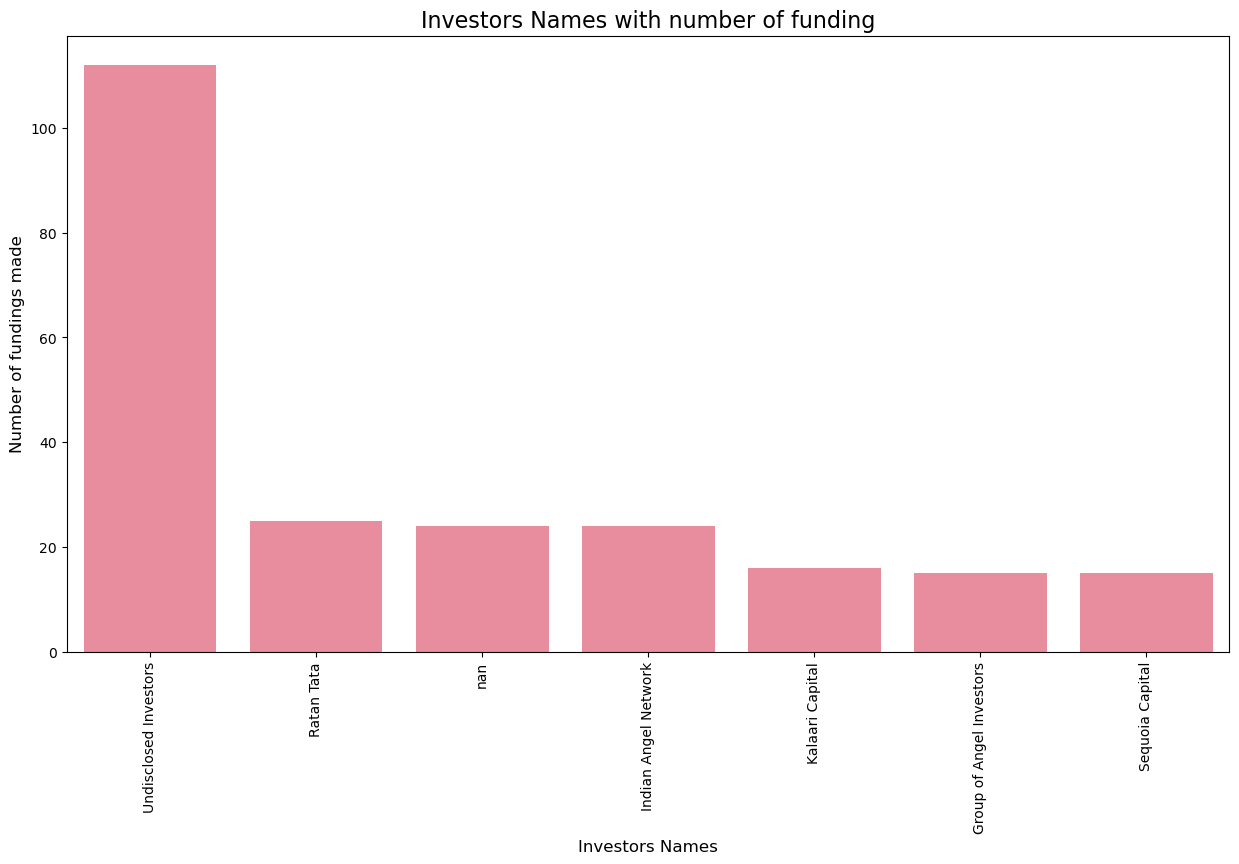

In [43]:
investors = funding_data['InvestorsName'].value_counts().head(7)
print(investors)
plt.figure(figsize=(15,8))
sns.barplot(x=investors.index, y=investors.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()


In [44]:
ian = df[df['InvestorsName'] == 'Undisclosed Investors']
ian_avg_investment = ian['CleanedAmount'].mean()
print("Average investment by Undisclosed Investors:", ian_avg_investment)
ian_finance_investments = df.loc[(df['InvestorsName'] == 'Undisclosed Investors') & (df['IndustryVertical'] == 'Finance'), 'CleanedAmount'].sum()
print('Undisclosed Investors', ian_finance_investments, 'in finance industry')


Average investment by Undisclosed Investors: 4046131.868131868
Undisclosed Investors 270000000.0 in finance industry


In [45]:
import plotly.express as px

investments = df[df['InvestorsName'] == 'Undisclosed Investors']

# Group by industry type and calculate total investment
industry_totals = investments.groupby(['IndustryVertical'])['CleanedAmount'].sum().head(10)

# Plot pie chart
fig = px.pie(values=industry_totals, names=industry_totals.index,
             title='Investments by Undisclosed investors  by Industry Type')
fig.show()


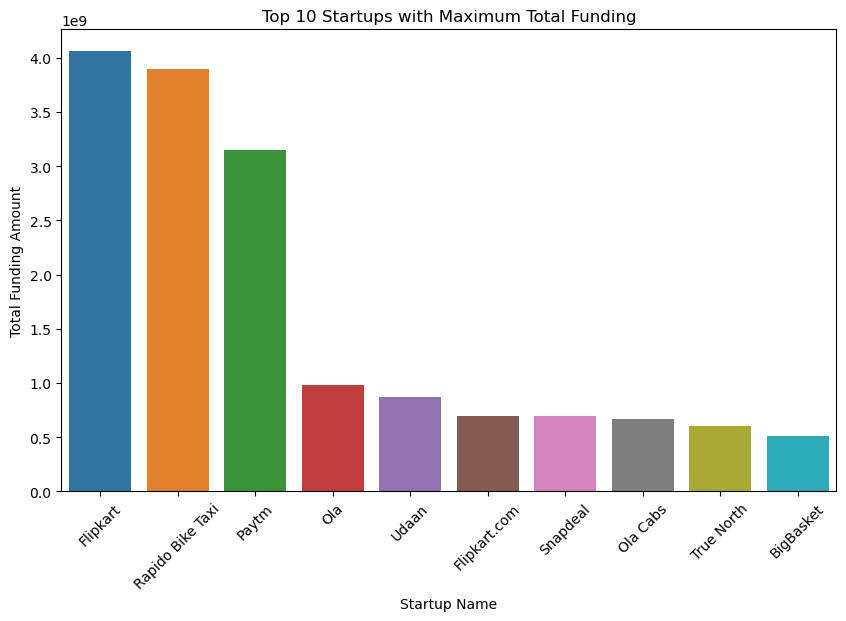

In [46]:
funding_data['StartupName'] = funding_data['StartupName'].replace('flipkar.com', 'flipkart')
# Group the data by startup name and calculate the total funding amount
startup_funding = funding_data.groupby('StartupName')['CleanedAmount'].sum().reset_index()

# Sort the data in descending order based on total funding amount
startup_funding = startup_funding.sort_values('CleanedAmount', ascending=False)

# Select the top 10 startups
top_10_startups = startup_funding.head(10)

# Plot the data using a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='StartupName', y='CleanedAmount', data=top_10_startups)
plt.xticks(rotation=45)
plt.xlabel('Startup Name')
plt.ylabel('Total Funding Amount')
plt.title('Top 10 Startups with Maximum Total Funding')
plt.show()


In [47]:
df=funding_data
df.head()
# Filter for industries with funding over 1000000

industryType = df.groupby(['IndustryVertical'])['CleanedAmount'].mean()

AboveM = industryType[industryType>100000000]
fig = px.scatter(x = AboveM.index,y=AboveM,color=AboveM,size=AboveM,title='Funding (100M+) Vs Industry Type',
                labels={
                    'x':'Industry Type',
                    'y':'Average Funding'
                })
fig.show()


In [48]:


import plotly.express as px

# Calculate total funding for each city
total_funding_by_city = df.groupby(['City'])['CleanedAmount'].sum()

# Filter for cities with funding over 1000000
above_billion = total_funding_by_city[total_funding_by_city > 1000000000]

# Create a scatter plot of total funding vs cities
fig = px.scatter(x=above_billion.index, y=above_billion, color=above_billion, size=above_billion,
                 title='Total Funding (1B+) Vs City',
                 labels={
                     'x': 'City',
                     'y': 'Total Funding'
                 },
                 size_max=100)

fig.show()


In [50]:

# Group by investor name and calculate total funding
investor_funding = df.groupby(['InvestorsName'])['CleanedAmount'].sum().reset_index()

# Get the top 10 investors by total funding
top10_investors = investor_funding.nlargest(10, 'CleanedAmount')

# Plot a bar chart of total funding vs top 10 investors
fig = px.bar(top10_investors, x='InvestorsName', y='CleanedAmount', title='Total Funding vs Top 10 Investors')
fig.show()


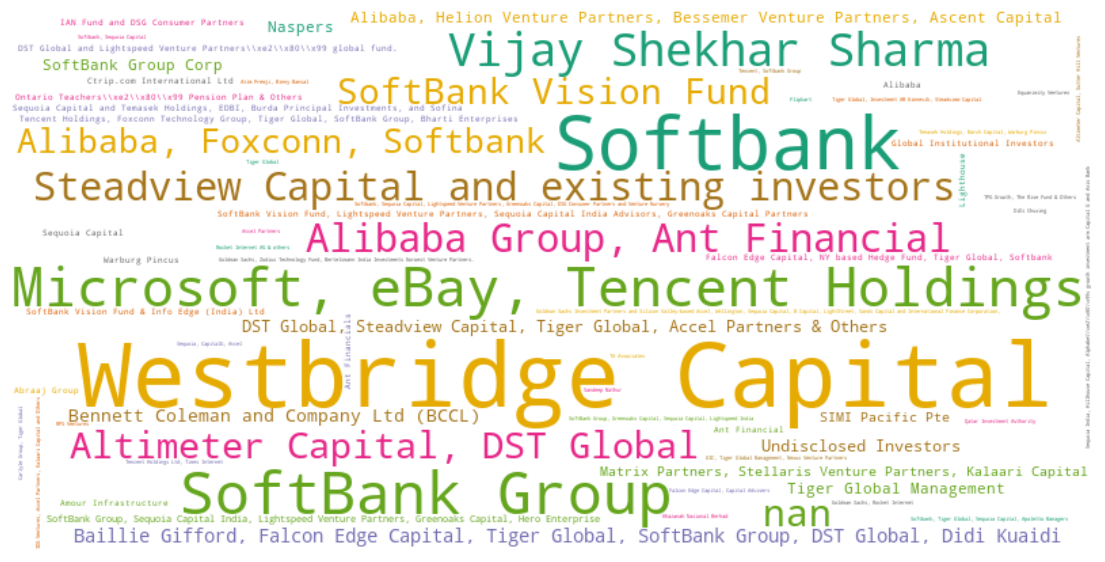

In [51]:
# Group the data by investor name and sum the total funding for each investor
investor_funding = df.groupby('InvestorsName')['CleanedAmount'].sum().reset_index()

# Generate the wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Dark2').generate_from_frequencies(dict(investor_funding.values))

plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


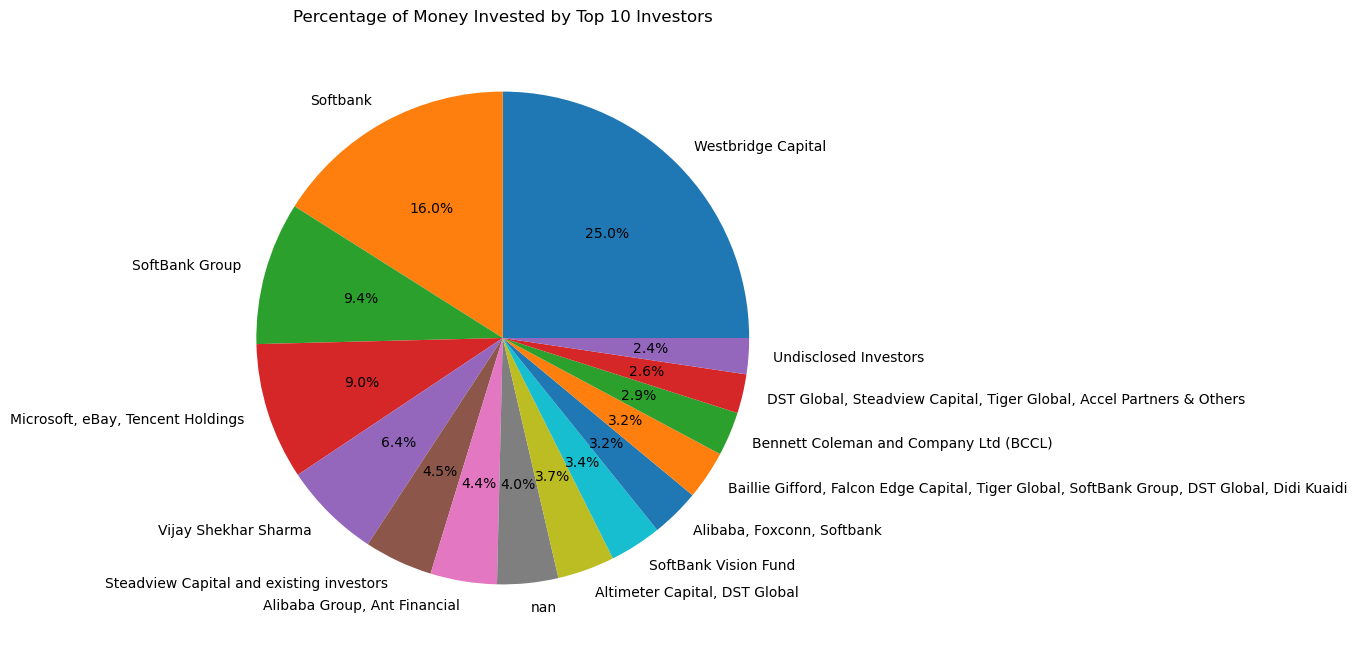

In [52]:
import matplotlib.pyplot as plt

# Calculate the total funding by all investors
total_funding = df['CleanedAmount'].sum()

# Group the data by investor name and sum the funding for each investor
investor_funding = df.groupby('InvestorsName')['CleanedAmount'].sum().reset_index()

# Calculate the percentage of funding for each investor
investor_funding['Percentage'] = investor_funding['CleanedAmount'] / total_funding * 100

# Sort the data by percentage in descending order and select the top 10 investors
top_investors = investor_funding.sort_values(by='Percentage', ascending=False).head(15)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_investors['Percentage'], labels=top_investors['InvestorsName'], autopct='%1.1f%%')
plt.title('Percentage of Money Invested by Top 10 Investors')
plt.show()



In [53]:
import pandas as pd
import plotly.express as px

# create a new dataframe with only the top 5 investors
top_investors = df.groupby('InvestorsName')['CleanedAmount'].sum().nlargest(5)
df_top_investors = df[df['InvestorsName'].isin(top_investors.index)]

# group the new dataframe by industry type and investor name
df_investor_industry = df_top_investors.groupby(['IndustryVertical', 'InvestorsName'])['CleanedAmount'].sum().reset_index()

# create a pie chart
fig = px.pie(df_investor_industry, values='CleanedAmount', names='IndustryVertical', 
             title='Top 5 Investors and the Industry Types they Invested in')

# add the investor name to the hover text
fig.update_traces(hovertemplate='<b>Industry Type:</b> %{label} <br><b>Amount:</b> %{value}<br><b>Investor:</b> %{customdata[0]}')

# set the investor name as customdata for each pie slice
fig.update_traces(customdata=df_investor_industry['InvestorsName'])

fig.show()


Investment trend in few industry types 

In [54]:
finance_df = df[df['IndustryVertical'] == 'Finance']
finance_df.info()
total_funding = finance_df.groupby('year')['CleanedAmount'].sum().reset_index()

fig = px.line(total_funding, x='year', y='CleanedAmount', title='Total Funding Amount by Year for Finance Startups')

fig.show()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 13 to 2065
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SNo               62 non-null     int64  
 1   Date              62 non-null     object 
 2   StartupName       62 non-null     object 
 3   IndustryVertical  62 non-null     object 
 4   SubVertical       62 non-null     object 
 5   City              62 non-null     object 
 6   InvestorsName     62 non-null     object 
 7   InvestmentType    62 non-null     object 
 8   AmountInUSD       62 non-null     object 
 9   Remarks           62 non-null     object 
 10  year              62 non-null     int64  
 11  yearmonth         62 non-null     object 
 12  CleanedAmount     57 non-null     float64
dtypes: float64(1), int64(2), object(10)
memory usage: 6.8+ KB


In [55]:
finance_df = df[df['IndustryVertical'] == 'E-Commerce']
finance_df.info()
total_funding = finance_df.groupby('year')['CleanedAmount'].sum().reset_index()

fig = px.line(total_funding, x='year', y='CleanedAmount', title='Total Funding Amount by Year for E-Commerce Startups')

fig.show()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 2 to 2818
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SNo               296 non-null    int64  
 1   Date              296 non-null    object 
 2   StartupName       296 non-null    object 
 3   IndustryVertical  296 non-null    object 
 4   SubVertical       296 non-null    object 
 5   City              296 non-null    object 
 6   InvestorsName     296 non-null    object 
 7   InvestmentType    296 non-null    object 
 8   AmountInUSD       296 non-null    object 
 9   Remarks           296 non-null    object 
 10  year              296 non-null    int64  
 11  yearmonth         296 non-null    object 
 12  CleanedAmount     204 non-null    float64
dtypes: float64(1), int64(2), object(10)
memory usage: 32.4+ KB


In [56]:
finance_df = df[df['IndustryVertical'] == 'Transportation']
finance_df.info()
total_funding = finance_df.groupby('year')['CleanedAmount'].sum().reset_index()

fig = px.line(total_funding, x='year', y='CleanedAmount', title='Total Funding Amount by Year for Transportation Startups')

fig.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 1 to 110
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SNo               4 non-null      int64  
 1   Date              4 non-null      object 
 2   StartupName       4 non-null      object 
 3   IndustryVertical  4 non-null      object 
 4   SubVertical       4 non-null      object 
 5   City              4 non-null      object 
 6   InvestorsName     4 non-null      object 
 7   InvestmentType    4 non-null      object 
 8   AmountInUSD       4 non-null      object 
 9   Remarks           4 non-null      object 
 10  year              4 non-null      int64  
 11  yearmonth         4 non-null      object 
 12  CleanedAmount     4 non-null      float64
dtypes: float64(1), int64(2), object(10)
memory usage: 448.0+ bytes
